# 1. Basic Setup (pip)

**I was using a different python system, not the one Jupyter is using, so whenever I wrote "pip install tensorflow ~", I was installing into a different Python system. That's why it still gave me an error. !{sys.executable} ~ code below fixes this error.**

In [1]:
import sys
print(sys.executable)

C:\venvs\venvs\tf_env\Scripts\python.exe


In [2]:
!where python

C:\venvs\venvs\tf_env\Scripts\python.exe
C:\Users\twksh\AppData\Local\Programs\Python\Python310\python.exe
C:\Users\twksh\AppData\Local\Programs\Python\Python311\python.exe
C:\Users\twksh\AppData\Local\Microsoft\WindowsApps\python.exe


In [3]:
# !{sys.executable} -m pip install --upgrade pip
# !{sys.executable} -m pip install tensorflow

**You can write pip install in one line as: pip install tensorflow opencv-python matplotlib**

In [4]:
pip install tensorflow 

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install "numpy<2.0.0" "h5py>=3.11,<3.15" "protobuf>=5.28.0,<6"

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install opencv-python==4.8.0.76

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip list | findstr "tensorflow matplotlib opencv-python"

matplotlib              3.10.6
matplotlib-inline       0.1.7
opencv-python           4.8.0.76
tensorflow              2.20.0
Note: you may need to restart the kernel to use updated packages.


In [9]:
import tensorflow as tf
import os

In [67]:
# pip list

**Checking if they are properly installed**

In [68]:
pip list | findstr "tensorflow matplotlib opencv-python h5py numpy protobuf"

h5py                    3.14.0
matplotlib              3.10.6
matplotlib-inline       0.1.7
numpy                   1.26.4
opencv-python           4.8.0.76
protobuf                5.29.5
tensorflow              2.20.0
Note: you may need to restart the kernel to use updated packages.


In [12]:
import tensorflow as tf
import os

In [13]:
#Example code
os.path.join('apple&orange', 'train_Apple')
#Returns a folder structure
os.listdir('apple&orange')
#List everything in the directory

['Apple', 'Orange']

**This code won't work anyway because I'm not using tensorflow gpu**

In [14]:
#Avoid Out of Memory(OOM) errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True) 
    #limiting the memory growth, keep it to whatever it needs

# 2. Collecting data(images) properly

In [15]:
import cv2 #opencv, which allows us to do computer vision tasks(e.g., image processing)
import imghdr #checks the file extensions
from matplotlib import pyplot as plt
import numpy as np

In [16]:
data_dir = 'apple&orange'
os.listdir(data_dir)
#print(os.listdir(os.path.join(data_dir, 'train_Apple')))
image_exts = ['jpeg', 'png', 'jpg', 'bmp']


In [69]:
ex_img = cv2.imread(os.path.join(data_dir, 'Apple', 'n07740461_11403.jpg'))
print(type(ex_img))
print(ex_img.shape) #shows the size of img (height in pixels, width, channels(grayscale/color))
# print(ex_img) # numpy array

<class 'numpy.ndarray'>
(256, 256, 3)


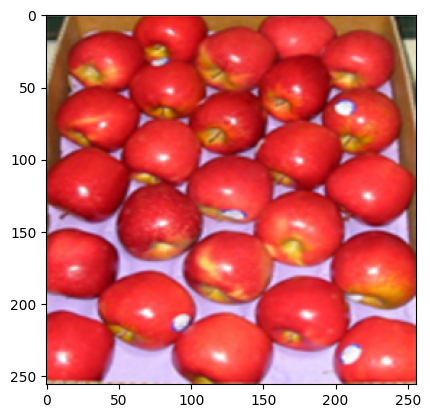

In [18]:
plt.imshow(cv2.cvtColor(ex_img, cv2.COLOR_BGR2RGB)) #display data as an image on a 2D regular raster
plt.show()

In [19]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path) #reads an image in a numpy array, which can then be manipulated and analyzed
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
            
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

# 3. Load data

In [70]:
# tf.data.Dataset??
#In Jupyter notebook, double question marks show the detailed information

In [21]:
tf.data.Dataset
#is an API in TensorFlow that provides an efficient and flexible way to represent and manipulate data. 
#It is used when working with large amounts of data that is going to be fed into a TensorFlow computational graph.

tensorflow.python.data.ops.dataset_ops.DatasetV2

**Information on functions: https://www.tensorflow.org/api_docs/python/tf/data/Dataset**

In [71]:
# tf.keras.utils.image_dataset_from_directory??

**Keras is a deep learning API, provides a python interface for artificial neural networks**

In [23]:
data = tf.keras.utils.image_dataset_from_directory('apple&orange')
# Builds image datasets for me (e.g., I don't have to define labels, size, etc.)

Found 1701 files belonging to 2 classes.


**apple&orange[0] will cause error because this data isn't preloaded into memory. Above code is genertor, and now we need to iterate over the data**

In [24]:
data_iterator = data.as_numpy_iterator()
# Used to convert the elements of a tf.data.Dataset into NumPy arrays 
# and return an iterator over these converted elements. 
# This method is particularly useful for inspecting the content of a dataset
# or when you need to work with the data in a NumPy

In [25]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000022ABA1B32E0>)

In [26]:
batch = data_iterator.next()

In [72]:
# batch # numpy array

In [28]:
print(len(batch))
print(batch[0].shape) # Images as numpy, 32 = batch size
# I can adjust variables by tf.keras.utils.image_dataset_from_directory('apple&orange', batch_size=16)
print(batch[1]) # Labels, 1 is either apple or orange, 0 is either apple or orange

2
(32, 256, 256, 3)
[0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 1 1]


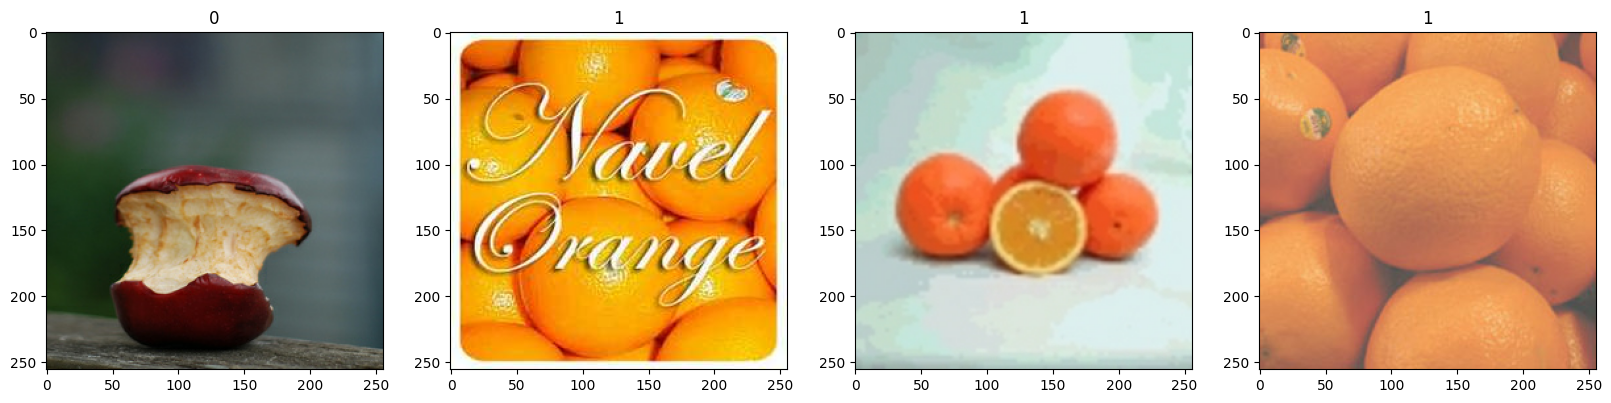

In [29]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int))
    ax[index].title.set_text(batch[1][index])

# Class 0 = Apple
# Class 1 = Orange

# 4. Scale Data

In [30]:
print(batch[0].min())
print(batch[0].max())
# Making a value as small as possible optimizes speed
scaled = batch[0]/255 #Gives value between 0 and 1

0.0
255.0


In [31]:
data = tf.keras.utils.image_dataset_from_directory('apple&orange')
data = data.map(lambda x,y: (x/255, y))
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

Found 1701 files belonging to 2 classes.


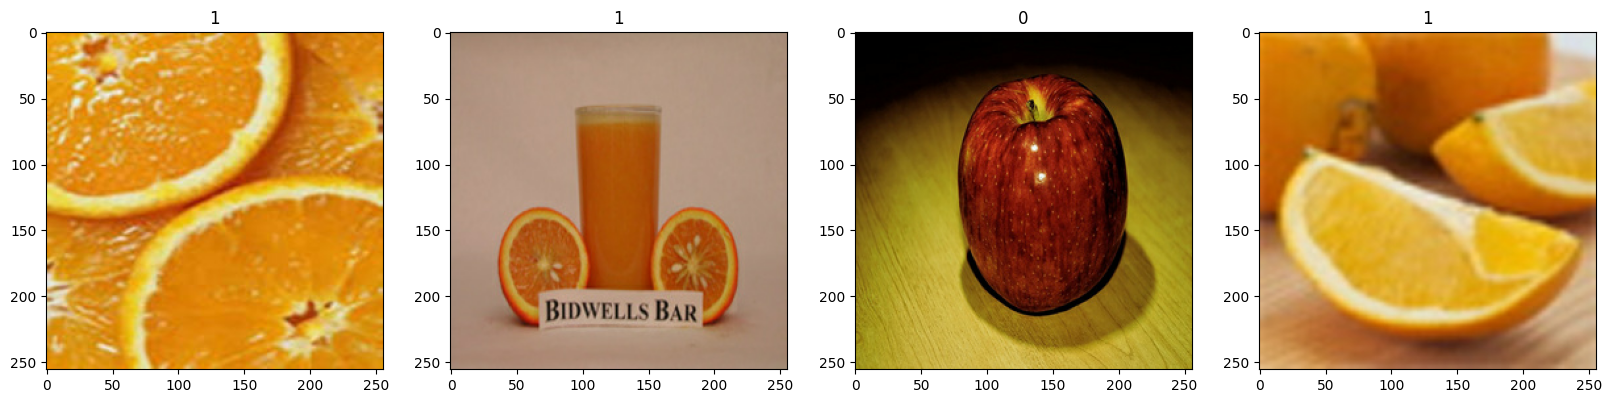

In [32]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img)                            # This line has modified
    ax[index].title.set_text(batch[1][index])

# 5. Split train and test data

In [33]:
len(data) #Makes sense because 1701/32 = 53.156

54

In [34]:
train_size = int(len(data)*0.7)                # 37
val_size = int(len(data)*0.2)+1  #Validation   # 11
test_size = int(len(data)*.1)+1                # 6

**Training data**: Used to teach a machine learning model to recognize patterns \
**Validation data**: Used to tune the model's hyperparameters and evaluate its performance on unseen data during the training process to prevent overfitting \
**Hyperparameter**: A Configurable setting in machine learning that controls the learning process and model complexity

In [35]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Deep Model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [37]:
model = Sequential() # Groups a linear stack of layers into a Model

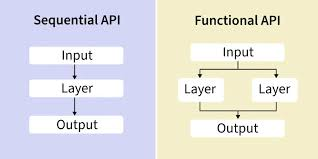

Relu: 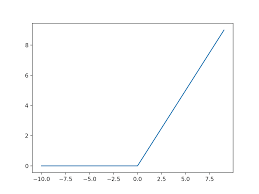
Sigmoid: 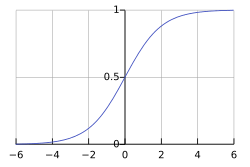

In [76]:
# MaxPooling2D??

In [39]:
# First layer of deep neural network --> needs input
# Scans over an image, and tries to condense/extract the relevant information to make an output classification
# 16 filters, (3 pixels, 3 pixels) filter size, 1 stride(moving 1 pixel each time)
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

# Process of converting a multi-dimensional data structure into a single-dimensional, "flat" structure
# To simplify data structures, making them easier to process or iterate through
model.add(Flatten())

# Fully-connected layer
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\venvs\venvs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Shows a list of functions available**\
tf.keras. + press Tab

In [40]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])
# adam is optimizer
# We're getting an output either 0 or 1, so 'Binary'Crossentropy
# accuracy, because it tells how well model is classifying as either 0 or 1

**Param #**: The number of weights and biases that a layer learns during training. The total number of parameters influences the model's complexity and its ability to learn complex patterns\
**Weight**: Determines the influence that one neuron's output has on the input of the next neuron

In [41]:
model.summary()
# 254/2 = 127 for maxpooling
# 30 * 30 * 16 = 14400 for flatten

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [42]:
 logdir = 'logs'

**Callbacks**: Used to customize and control the behavior of a **Keras model during training, evaluation, or inference**. They are functions that are called at various stages of the model's lifecycle, **save the model at a particular checkpoint**, allowing for dynamic adjustments, **logging**, and performance monitoring. 

In [43]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

**Fit**: A method used to train a machine learning model. It learns the underlying patterns and relationships within the provided training data.

In [44]:
# Epoch: An epoch refers to one complete pass through the entire training dataset
# Running for multiple epochs allows the model to refine its parameters iteratively 
# and progressively improve its accuracy.

# It will log all of the information from the model to the tensorboard_callback

In [45]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 365ms/step - accuracy: 0.5802 - loss: 0.7630 - val_accuracy: 0.7614 - val_loss: 0.5478
Epoch 2/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 386ms/step - accuracy: 0.8277 - loss: 0.4109 - val_accuracy: 0.8523 - val_loss: 0.3167
Epoch 3/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 371ms/step - accuracy: 0.8733 - loss: 0.2995 - val_accuracy: 0.9034 - val_loss: 0.2568
Epoch 4/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 363ms/step - accuracy: 0.9189 - loss: 0.2227 - val_accuracy: 0.9375 - val_loss: 0.1819
Epoch 5/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 15s 412ms/step - accuracy: 0.9299 - loss: 0.1848 - val_accuracy: 0.9489 - val_loss: 0.1492
Epoch 6/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 367ms/step - accuracy: 0.9367 - loss: 0.1605 - val_accuracy: 0.9347 - val_loss: 0.2220
Epoch 7/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 363ms/step - accuracy: 0.9510 - loss: 0.1373 - val_accuracy: 0.9460 - val_loss: 0.1508
Epoch 8/20
37/37 ━━━━━━━━━━━━━━━━━━━━ 14s 380ms/step - accuracy: 0.9535 - loss: 0.1143 - val_accu

In [46]:
hist

In [77]:
# hist.history # Shows the data in a dictionary format

**Figure**: Used to create a new figure object. A figure object represents the entire window or canvas on which plots (axes) are drawn.

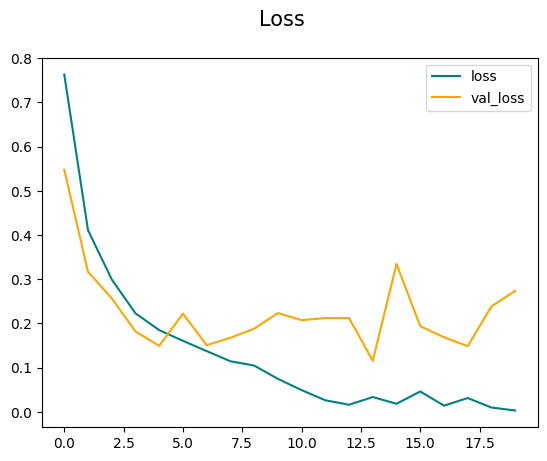

In [48]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=15)
plt.legend(loc="upper right")
plt.show()

**If loss is not decreasing**: Not able to learn, train set might have a problem, e.g., biased data \
**If val_loss is not decreasing**: Model may be overfitting, may need to apply/change data

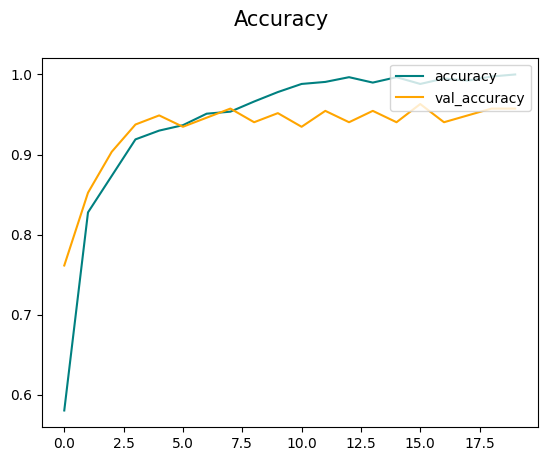

In [49]:
fig2 = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle("Accuracy", fontsize=15)
plt.legend(loc="upper right")
plt.show()

# 8. Evaluate Performance

In [50]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [51]:
pre = Precision() # Computes the precision of the predictions with respect to the labels
# true_positives and false_positives
rec = Recall() #  Measures the proportion of actual positive cases that were correctly identified by the model
# true_positives and false_negatives
acc = BinaryAccuracy() # Calculates how often predictions match binary labels


In [52]:
len(test)

6

In [53]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x) # Values between 0 and 1, sigmoid activation
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


In [54]:
print(f'Precision: {pre.result()}, Recall: {rec.result()}, Accuracy: {acc.result()}')

Precision: 0.9473684430122375, Recall: 0.97826087474823, Accuracy: 0.9575757384300232


In [55]:
print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')
# High number means performing better, highest value: 1.0

Precision: 0.9473684430122375, Recall: 0.97826087474823, Accuracy: 0.9575757384300232


# 9. Test

## 9.1 Test Apple

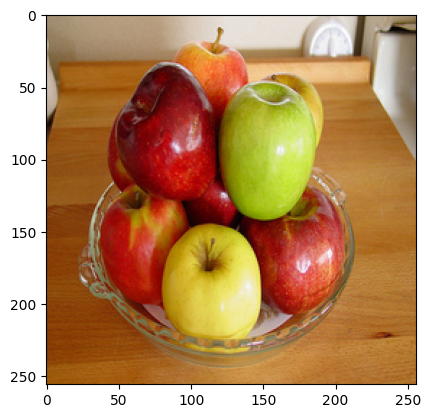

In [56]:
img = cv2.cvtColor(cv2.imread('n07740461_790.jpg'), cv2.COLOR_BGR2RGB)
# This line was originally this: img = cv2.imread('n07749192_126.jpg')
# But, since the color plays crucial role for apple vs orange, I'm converting the color to RGB

resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [57]:
resize.shape

TensorShape([256, 256, 3])

In [58]:
np.expand_dims(resize, 0).shape # Because model.predict allows only batch of images

(1, 256, 256, 3)

In [59]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat # Successful!

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[8.785477e-06]], dtype=float32)

In [60]:
if yhat < 0.5: print(f'Predicted class is an Apple')
else: print(f'Predicted class is an Orange')

Predicted class is an Apple


## 9.2 Test Orange

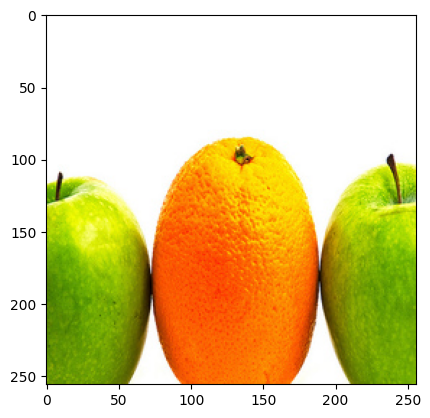

In [61]:
img = cv2.cvtColor(cv2.imread('n07749192_4320.jpg'), cv2.COLOR_BGR2RGB)
# n07749192_4220.jpg
# n07749192_4020.jpg, failed
# n07749192_4320.jpg
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [62]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


array([[0.99999803]], dtype=float32)

In [63]:
if yhat < 0.5: print(f'Predicted class is an Apple')
else: print(f'Predicted class is an Orange')

Predicted class is an Orange


# 10. Saving the model

In [64]:
from tensorflow.keras.models import load_model

**Serialization**: The process of converting an object's state into a format, such as a stream of bytes or a string, that can be saved, stored, or transmitted and later reconstructed into the original object

In [65]:
model.save(os.path.join('models', 'imageClassifierAppleOrange.h5'))
# Saves the entire state of a Keras model to a file, enabling its later loading and reuse.
# File format h5 serializes the model

## 10.1 Reload model

In [66]:
new_model = load_model(os.path.join('models', 'imageClassifierAppleOrange.h5'))
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))
print(yhatnew)
if yhat < 0.5: print(f'Predicted class is an Apple')
else: print(f'Predicted class is an Orange')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
[[0.99999803]]
Predicted class is an Orange
